# Аналитика: визуализация данных
Основа анализа любых данных - это их визуализация. В Python для этой цели есть две наиболее популярные библиотеки: matplotlib и seaborn. Они позволяют строить и сохранять различные виды графиков по вашим данным.

Мы рассмотрим работу с ними на конкретном датасете: история задержек вылетов пассажирских рейсов за 2008 год. Этот дадасет собран по данным Министерства транспорта США. Он включает в себя информацию о датах вылета и прилета рейсов, задержках, переносах, отменах и их причинах.

## Matplotlib (немного простых графиков)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# графики внутри jupyter
%matplotlib inline

График состоит из объектов **figure**, **axes** и других. Внутри одной фигуры (рисунка) может быть несколько осей (графиков), подписей, линий и прочего. Нарисуем что-нибудь простое.

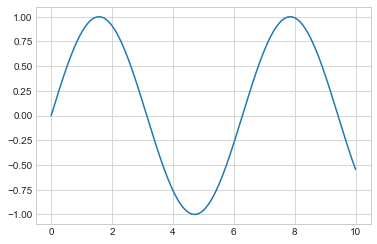

In [13]:
def draw():
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(0, 10, 1000)
    ax.plot(x, np.sin(x))  # можно использовать plt.plot()
    
draw()

Matplotlib поддерживает несколько различных стилей отрисовки графиков, про которые можно почитать в [документации](https://matplotlib.org/users/customizing.html)

In [14]:
plt.style.use('seaborn-whitegrid')

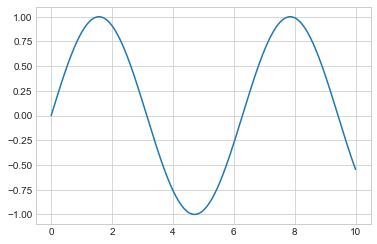

In [15]:
draw()

In [16]:
plt.style.available  # все доступные стили

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

### Немного "линейных" графиков

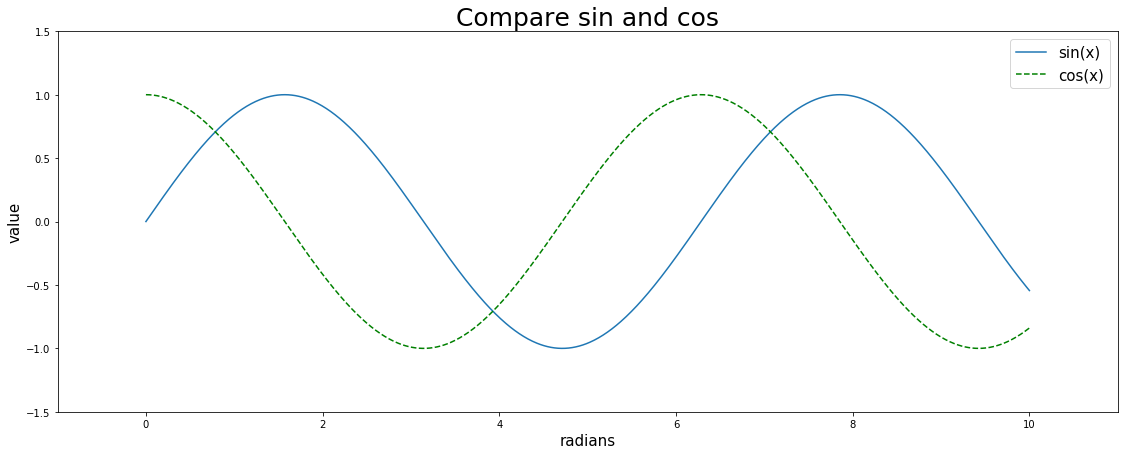

In [3]:
def draw_two_lines():
    fig = plt.figure(figsize=(19,7))
    ax = plt.axes()
    x = np.linspace(0, 10, 1000)
    ax.plot(x, np.sin(x), label='sin(x)')
    ax.plot(x, np.cos(x), label='cos(x)', color='g', linestyle='--')
    ax.legend(loc='best', prop={'size': 15})
    ax.set_xlabel('radians', size=15)
    ax.set_ylabel('value', size=15)
    ax.set_title('Compare sin and cos', size=25)
    ax.set_xlim(-1, 11)   
    ax.set_ylim(-1.5, 1.5)    # можно поменять пределы местами и будет зеркальное отображение
    
draw_two_lines()

### Необязательная задачка
Поищите в документации про параметр-маркер у plt.plot(). Он позволяет рисовать точки, треугольники и много еще чего, соединять их при этом различными линиями и сразу указывать цвет.

### Диаграммы рассеяния (scatter)

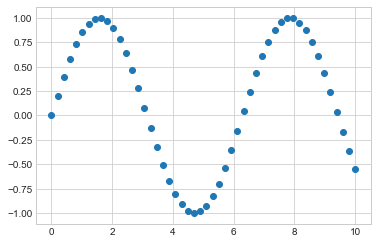

In [18]:
def draw_scatter():
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(0, 10, 50)
    ax.scatter(x, np.sin(x))  # вместо ax.plot
    
draw_scatter()

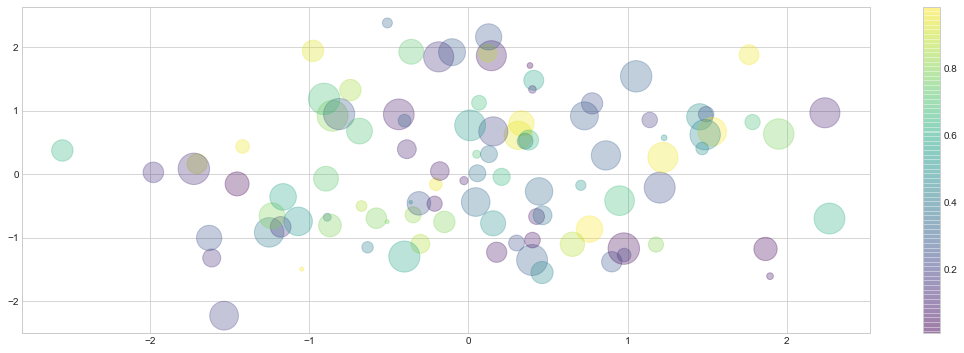

In [19]:
def draw_beauty_scatter():
    # создаем 100 рандомных координат
    rng = np.random.RandomState(0)
    x = rng.randn(100)
    y = rng.randn(100)
    
    # выбираем "цвета" и размеры наших точек
    colors = rng.rand(100)
    sizes = 1000 * rng.rand(100)
    
    # рисуем красивую картинку
    plt.figure(figsize=(19, 6))
    plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
               cmap='viridis')
    plt.colorbar()  # цветовая панель справа
    
draw_beauty_scatter()

### Что лучше: plot или scatter?
При небольших объемах данных это не играет роли, но при наборах данных, превышающих несколько тысяч точек, **функция plt.plot может оказаться намного эффективнее plt.scatter**. Поскольку plt.scatter умеет визуализировать различные размеры и цвета каждой точки, визуализатору приходится выполнять дополнительную работу по формированию каждой точки в отдельности. В случае же функции plt.plot все точки одинаковые, поэтому работа по определению внешнего вида точек выполняется только один раз для всего набора данных. Для больших наборов данных это различие может приводить к коренным различиям в производительности, поэтому в таком случае следует использовать функцию plt.plot, а не plt.scatter.

### Что еще умеет matplotlib?
Очень-очень-очень много всего:
* погрешности: plt.errorbar
* заливка частей графиков: plt.fill_between
* контурные графики: plt.contour и plt.contourf
* отображение изображений: plt.imshow 
* гистограммы: plt.hist, plt.hist2d и plt.hexbin

А если это все объединять и активно использовать параметры, то можно построить абсолютно любой график (ограничений почти нет). Главное - найти документацию и суметь разобраться в ней (на деле это может оказаться не так просто, как кажется).

### Несколько графиков на одном рисунке
Есть два способа: извращенный (через параметры plt.axes) и нормальный. Первый мы рассматривать не будем, но если вам понадобится что-то неординарное, то он позволит нарисовать почти что угодно.

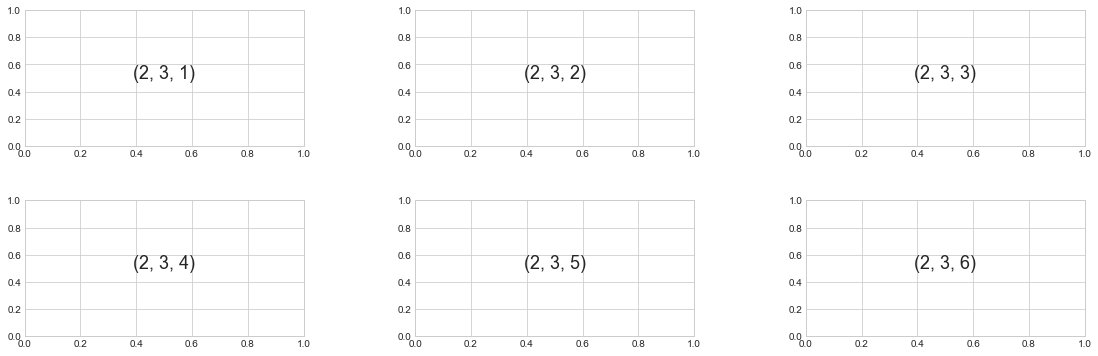

In [20]:
def draw_subplots():
    fig = plt.figure(figsize=(19, 6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # добавляем расстояние между графиками
    for i in range(1, 7):
        ax = fig.add_subplot(2, 3, i)      # (2, 3) - это размер "таблицы", i - позиция
        ax.text(0.5, 0.5, str((2, 3, i)),
                fontsize=18, ha='center')  # добавляем красоты
    
draw_subplots()

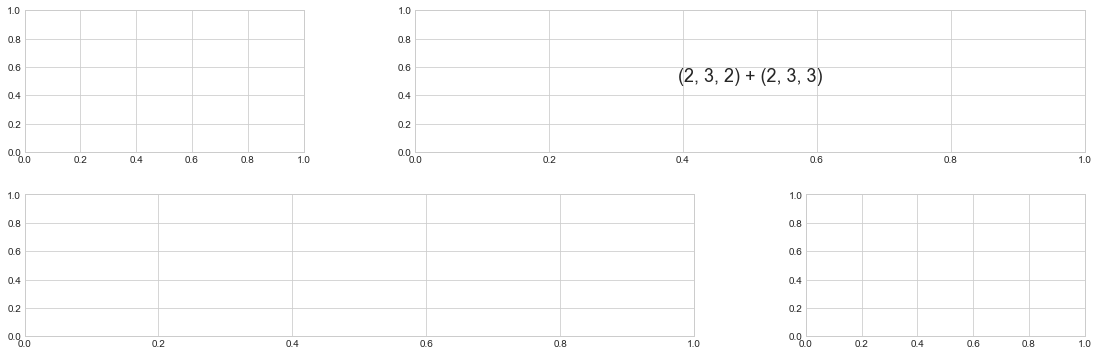

In [21]:
def draw_hard_subplots():
    fig = plt.figure(figsize=(19, 6))
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    plt.subplot(grid[0, 0])
    ax = plt.subplot(grid[0, 1:])
    ax.text(0.5, 0.5, "(2, 3, 2) + (2, 3, 3)",
                fontsize=18, ha='center')
    plt.subplot(grid[1, :2])
    plt.subplot(grid[1, 2]);
    
draw_hard_subplots()

---
## Задача 1
Перепишите функцию draw_beauty_scatter так, чтобы на результирующем рисунке было:
* 3 графика в два ряда (в одном из рядов будет 2 графика сразу);
* графики использует в качестве размера точки: $1000 * x$, $1000 * y$ и $1000 * size$;
* у каждого графика подписаны оси координат;
* заголовок рисунка

---
## Разбор реального кейса
**Или "Переходим к интересной части"**

Для начала скачайте данные [здесь](https://yadi.sk/d/EB2Hct-S3TFgNR). Потом можно прочитать описание или сразу ринуться в бой вслепую (но не рекомендую).

## Описание данных
[Ссылка](https://www.kaggle.com/giovamata/airlinedelaycauses/data) на полное описание данных.<br/>
**DayOfWeek:** день недели (1 - понедельник)<br/>
**DepTime:** фактическое время вылета (локальное) в формате ччмм<br/>
**CRSDepTime:** время вылета по расписанию (локальное) в формате ччмм<br/>
**ArrTime:** фактическое время прилета (локальное) в формате ччмм<br/>
**CRSArrTime:** время прилета по расписанию (локальное) в формате ччмм<br/>
**UniqueCarrier:** уникальный код перевозчика<br/>
**FlightNum:** номер рейса<br/>
**TailNum:** бортовой номер самолета<br/>
**ActualElapsedTime:** время полета (минуты)<br/>
**AirTime:** время в воздухе (минуты)<br/>
**ArrDelay:** время задержки прибытия (минуты)<br/>
**DepDelay:** время задержки отправления (минуты)<br/>
**Distance:** расстояние в милях<br/>
**Cancelled:** отменен ли был рейс?<br/>
**CancellationCode:** причина отмены полета (A = перевозчик, B = погода, C = NAS, D = безопасность)<br/>
**Diverted:** перенесен ли рейс?<br/>

## Разбираемся с тем, что внутри

In [22]:
df = pd.read_csv("doc/delayed_flights.csv", index_col=0, parse_dates=True)
df.head(2)

,day_of_week,dep_time,arr_time,unique_carrier,flight_num,tail_num,actual_elapsed_time,air_time,arr_delay,dep_delay,dest,distance,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,NASdelay,security_delay,late_aircraft_delay
date,,,,,,,,,,,,,,,,,,,,
2008-01-03,4,2003,2211.0,WN,335,N712SW,128.0,116.0,-14.0,8.0,TPA,810,0,N,0,NaN,NaN,NaN,NaN,NaN
2008-01-03,4,754,1002.0,WN,3231,N772SW,128.0,113.0,2.0,19.0,TPA,810,0,N,0,NaN,NaN,NaN,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573903 entries, 2008-01-03 to 2008-03-17
Data columns (total 20 columns):
day_of_week            573903 non-null int64
dep_time               573903 non-null int64
arr_time               571656 non-null float64
unique_carrier         573903 non-null object
flight_num             573903 non-null int64
tail_num               573901 non-null object
actual_elapsed_time    571656 non-null float64
air_time               571656 non-null float64
arr_delay              571656 non-null float64
dep_delay              573903 non-null float64
dest                   573903 non-null object
distance               573903 non-null int64
cancelled              573903 non-null int64
cancellation_code      573903 non-null object
diverted               573903 non-null int64
carrier_delay          380529 non-null float64
weather_delay          380529 non-null float64
NASdelay               380529 non-null float64
security_delay         380529 non-null floa

Индекс заботливо переведен в datetime64[ns], а значит можно будет совершать операции над временем (вспоминаем прошлый семинар)

Если прочитать описание данных (или внимательно приглядеться), можно увидеть, что времена отлета и прилета записаны очень неудобно. Нужна предобработка данных

In [24]:
df.dep_time = df.dep_time.astype(int)
df['dttm'] = df.index + df.dep_time.apply(lambda x: timedelta(hours=x//100, minutes=x%100))
df = df.sort_values('dttm')
df.head(2)

,day_of_week,dep_time,arr_time,unique_carrier,flight_num,tail_num,actual_elapsed_time,air_time,arr_delay,dep_delay,...,distance,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,NASdelay,security_delay,late_aircraft_delay,dttm
date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,2,1,228.0,WN,106,N736SA,87.0,77.0,233.0,251.0,...,611,0,N,0,151.0,0.0,0.0,0.0,82.0,2008-01-01 00:01:00
2008-01-01,2,1,117.0,WN,3558,N613SW,76.0,62.0,137.0,146.0,...,405,0,N,0,51.0,0.0,0.0,0.0,86.0,2008-01-01 00:01:00


У DataFrame есть метод, позволяющий построить некоторые основные статистики для количественных данных (аналогичный метод есть у Series). Качественные данные, например, информацию о перевозчиках, можно смотреть через метод value_counts - по сути он возвращает гистограмму, которую потом можно визуализировать.<br/>
Давайте посмотрим на статистики по количественным признакам и посмотрим на распределение количества поездок от различных перевозчиков (заодно научимся строить barchart).

In [25]:
df.describe()

,day_of_week,dep_time,arr_time,flight_num,actual_elapsed_time,air_time,arr_delay,dep_delay,distance,cancelled,diverted,carrier_delay,weather_delay,NASdelay,security_delay,late_aircraft_delay
count,573903.000000,573903.000000,571656.000000,573903.000000,571656.000000,571656.000000,571656.000000,573903.000000,573903.000000,573903.0,573903.000000,380529.000000,380529.000000,380529.000000,380529.000000,380529.000000
mean,3.970805,1511.401826,1606.747731,2219.417173,132.499480,107.569972,43.218528,43.791026,752.078816,0.0,0.003915,19.010725,3.787138,14.193686,0.100208,26.003146
std,1.988567,450.789956,543.719554,1941.236488,70.286562,67.347273,56.526024,53.144075,556.676787,0.0,0.062450,43.034091,21.835173,32.980814,1.896901,41.982946
min,1.000000,1.000000,1.000000,1.000000,15.000000,0.000000,-69.000000,6.000000,24.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1156.000000,1313.000000,619.000000,81.000000,58.000000,10.000000,13.000000,337.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1539.000000,1709.000000,1547.000000,116.000000,90.000000,26.000000,25.000000,603.000000,0.0,0.000000,2.000000,0.000000,1.000000,0.000000,10.000000
75%,6.000000,1858.000000,2028.000000,3669.000000,164.000000,137.000000,57.000000,54.000000,991.000000,0.0,0.000000,21.000000,0.000000,14.000000,0.000000,35.000000
max,7.000000,2400.000000,2400.000000,9740.000000,727.000000,664.000000,2461.000000,2457.000000,4962.000000,0.0,1.000000,1490.000000,1148.000000,1357.000000,149.000000,1254.000000


In [26]:
# Построим распределение количества полетов для перевозчиков
carriers = df.unique_carrier.value_counts()
carriers

WN    114664
AA     56433
MQ     43399
OO     41527
UA     41245
XE     32371
US     29417
DL     28704
CO     27397
NW     25536
EV     24974
FL     20447
9E     19701
YV     16796
OH     15910
B6     15116
AS     10472
F9      8159
HA       885
AQ       750
Name: unique_carrier, dtype: int64

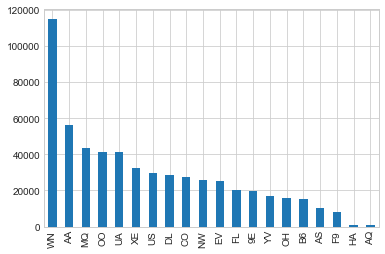

In [27]:
carriers.plot.bar()  # все очень просто

## Постановка задачи
Бесцельно смотреть на данные - это не очень интересно, поэтому вот вам задача.

У нас есть данные о перелетах с 1 января 2008 по 1 апреля 2008. Давайте попробуем ответить на вопрос: что влияет на задержки прилета рейсов?

### Шаг 0. Изучение данных о времени задержки рейса
Давайте поймем как у нас в данных хранится время задержки рейса и построим его распределение.

Время задержки хранится отдельной колонкой: dep_delay

In [28]:
delay = df.arr_delay
descr = delay.describe()
descr

count    571656.000000
mean         43.218528
std          56.526024
min         -69.000000
25%          10.000000
50%          26.000000
75%          57.000000
max        2461.000000
Name: arr_delay, dtype: float64

#### Впоросы:
1. Что можно сказать по этим данным?
2. У Series есть метод hist(), который выводит гистограмму значений. Можно ли просто им воспользоваться, чтобы увидеть распределение или нужна предобработка данных?

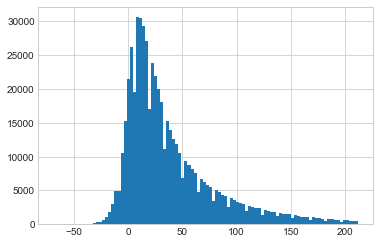

In [29]:
low = descr['mean'] - 3 * descr['std']
up = descr['mean'] + 3 * descr['std']
delay[(low < delay) & (delay < up)].hist(bins=100)

### Шаг 1. Изучение зависимостей от одного признака

In [30]:
def plot_scatter(delay, factor):
    fig = plt.figure(figsize=(17,6))
    x = factor.values
    y = delay.values
    if isinstance(x[0], str):
        # если мощности не хватает, можно закомментить и смотреть другими методами
        x = df.flight_num.values
        ticks = list(set(x))
        x = [ticks.index(name) for name in x]
        plt.xticks(x, ticks)
    plt.plot(x, y, 'o', alpha=0.3)
    plt.title("Зависимость arr_delay от %s" % factor.name, size=25)
    plt.xlabel(factor.name, size=15)
    plt.ylabel("arr_delay", size=15)
    plt.show()

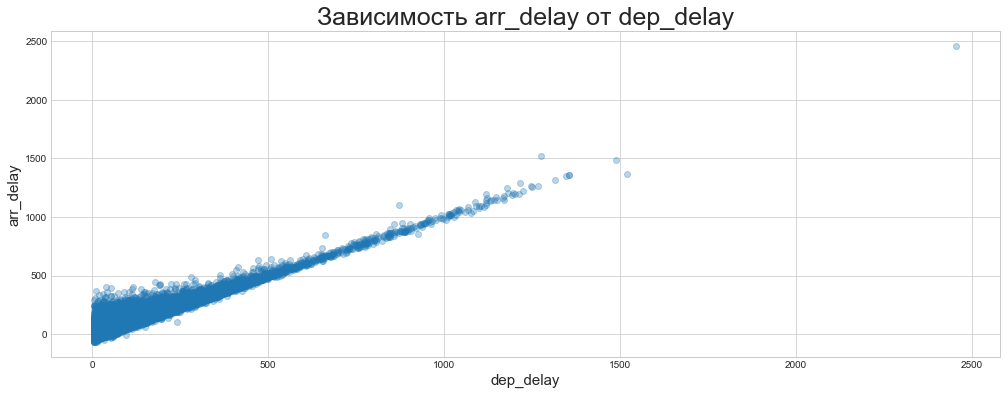

In [31]:
plot_scatter(delay, df.dep_delay)

#### Впоросы:
1. Какие выводы можно сделать из графика?
2. Всегда ли видя такую картинку можно делать аналогичный вывод?


На самом деле у DataFrame есть метод, позволяющий строить сразу группу таких графиков, но он может работать достаточно долго, особенно на больших наборах данных.

### Задача 2
Попробуйте поизучать зависимости времени задержки прилета от других факторов и сделайте выводы.

### Шаг 2. Изучение зависимостей от группы признаков
Идея изучения подобных зависимостей в том, что возможно в данные можно разделить на более мелкие сегменты, внутри которых есть зависимости, не замеченные на всем наборе.

### Задача 3
Напишите функцию, которая позволит изучать подобные зависимости.